In [25]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random

In [19]:
# Load the McDonald's dataset
mcdonalds = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")
print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [20]:

MD_x = mcdonalds.iloc[:, 0:11]

MD_x = (MD_x == "Yes").astype(int)

# Calculate column means
col_means = np.round(MD_x.mean(), 2)

print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [21]:
# Select the first 11 columns
MD_x = mcdonalds.iloc[:, 0:11]

# Convert "Yes" to 1 and everything else to 0
MD_x = (MD_x == "Yes").astype(int)

# Perform PCA
MD_pca = PCA()
MD_pca.fit(MD_x)

# Print summary
explained_variance_ratio = MD_pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

print("Standard deviations (Eigenvalues):", MD_pca.singular_values_)
print("Proportion of Variance Explained:", explained_variance_ratio)
print("Cumulative Proportion of Variance Explained:", cumulative_variance_ratio)


Standard deviations (Eigenvalues): [28.84746118 23.14716582 19.22858381 15.19626736 12.85685762 11.82305052
 11.03895052 10.48355462 10.10742431  9.48214684  9.02721076]
Proportion of Variance Explained: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative Proportion of Variance Explained: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [22]:

# Define the number of digits you want to display
digits = 1

print("Standard deviations (Eigenvalues):")
print([round(eigval, digits) for eigval in MD_pca.singular_values_])

print("\nProportion of Variance Explained:")
print([round(var_ratio, digits) for var_ratio in MD_pca.explained_variance_ratio_])

print("\nCumulative Proportion of Variance Explained:")
cumulative_variance_ratio = MD_pca.explained_variance_ratio_.cumsum()
print([round(cum_var_ratio, digits) for cum_var_ratio in cumulative_variance_ratio])


print("Standard deviations (1, .., p=11):")
print(MD_pca.singular_values_.round(1))

print("Rotation (n x k) = (11 x 11):")
print(pd.DataFrame(MD_pca.components_, columns=MD_x.columns).round(2))

Standard deviations (Eigenvalues):
[28.8, 23.1, 19.2, 15.2, 12.9, 11.8, 11.0, 10.5, 10.1, 9.5, 9.0]

Proportion of Variance Explained:
[0.3, 0.2, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0]

Cumulative Proportion of Variance Explained:
[0.3, 0.5, 0.6, 0.7, 0.8, 0.8, 0.9, 0.9, 0.9, 1.0, 1.0]
Standard deviations (1, .., p=11):
[28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]
Rotation (n x k) = (11 x 11):
    yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0   -0.48       -0.16  -0.01       0.12    0.30 -0.11  -0.34  -0.47   
1    0.36        0.02   0.02      -0.03   -0.06 -0.09  -0.61   0.31   
2   -0.30       -0.06  -0.04      -0.32   -0.80 -0.06  -0.15  -0.29   
3    0.06       -0.14   0.20      -0.35    0.25 -0.10   0.12  -0.00   
4   -0.31        0.28   0.07      -0.07    0.36  0.11  -0.13  -0.21   
5    0.17       -0.35  -0.36      -0.41    0.21 -0.59  -0.10  -0.08   
6   -0.28       -0.06   0.71      -0.39    0.04 -0.09  -0.04   0.36   
7    0.01       -

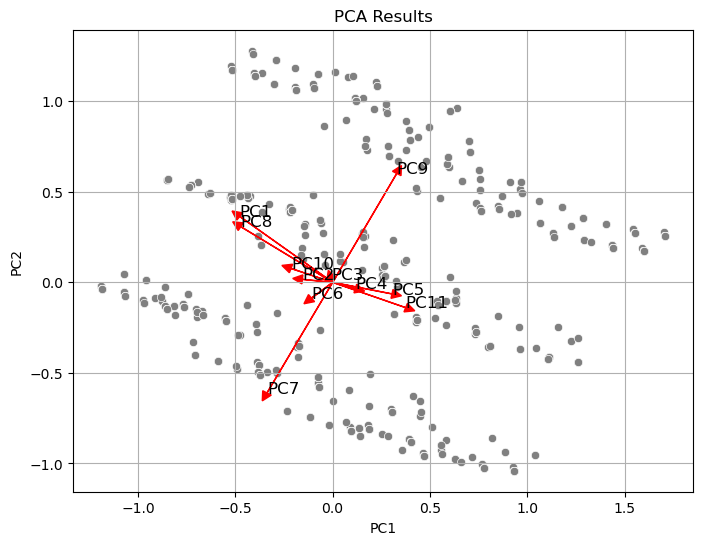

In [23]:
# Transform the data to the PCA space
pca_transformed = MD_pca.transform(MD_x)

# Create a scatter plot of the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], color="grey")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Results")

# Plot the projected axes (principal components)
proj_axes = MD_pca.components_[:2, :].T  # Take the first 2 PCs for projection
for i, (x, y) in enumerate(proj_axes):
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='r', ec='r')
    plt.text(x, y, f'PC{i+1}', fontsize=12)

plt.grid()
plt.show()


In [28]:

# Set a random seed for reproducibility
np.random.seed(1234)

# Define a function to perform k-means clustering and return silhouette score
def kmeans_with_silhouette(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    labels = kmeans.fit_predict(data)
    return labels, silhouette_score(data, labels)

# Perform k-means clustering for a range of cluster numbers
best_labels = None
best_score = -1
best_n_clusters = None

silhouette_scores = []  # Store silhouette scores for each cluster number

for n_clusters in range(2, 9):
    labels, score = kmeans_with_silhouette(MD_x, n_clusters)
    silhouette_scores.append(score)
    if score > best_score:
        best_score = score
        best_labels = labels
        best_n_clusters = n_clusters

print(f"Best number of clusters: {best_n_clusters}")

# Relabel the clusters (optional)
unique_labels = np.unique(best_labels)
new_labels = random.sample(range(1, len(unique_labels) + 1), len(unique_labels))
label_mapping = dict(zip(unique_labels, new_labels))
relabeled_clusters = np.vectorize(label_mapping.get)(best_labels)

# Add the cluster labels to the original DataFrame
mcdonalds['Cluster'] = relabeled_clusters

print(mcdonalds)


Best number of clusters: 8
     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gender  

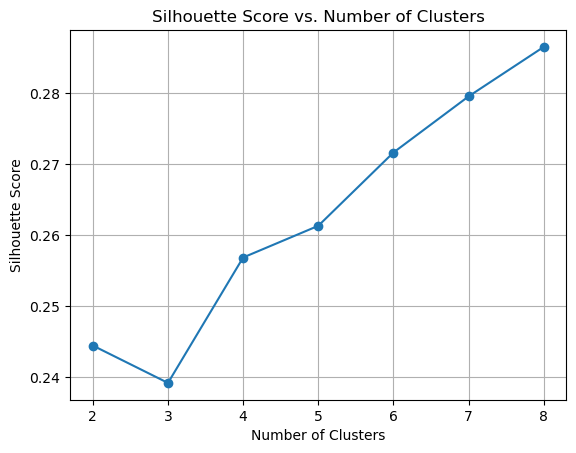

In [29]:
# Create a plot of silhouette scores for different cluster numbers
plt.plot(range(2, 9), silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.grid()
plt.show()